Marketing channels across age groups

Some marketing stakeholders want to know if their marketing channels are reaching all users equally or if some marketing channels are serving specific age demographics.

Within a marketing team, it is common to get requests that require quick analysis and visualization. The better you are at visualizing the results, the more likely that you will effectively communicate your findings to your stakeholders.

In this exercise, you will create a grouped bar chart showing how many people each marketing channel reached by age group.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
marketing = pd.read_csv('marketing_new.csv')
marketing

Unnamed: 0     user_id date_served marketing_channel          variant  \
0               0  a100000029  2018-01-01         House Ads  personalization   
1               1  a100000030  2018-01-01         House Ads  personalization   
2               2  a100000031  2018-01-01         House Ads  personalization   
3               3  a100000032  2018-01-01         House Ads  personalization   
4               4  a100000033  2018-01-01         House Ads  personalization   
...           ...         ...         ...               ...              ...   
10032       10032  a100007290  2018-01-17             Email          control   
10033       10033  a100007291  2018-01-17             Email          control   
10034       10034  a100007292  2018-01-05         Instagram          control   
10035       10035  a100007293  2018-01-17             Email          control   
10036       10036  a100007294  2018-01-06          Facebook          control   

       converted language_displayed language_preferred    age_group  \
0           True            English            English   0-18 years   
1           True            English            English  19-24 years   
2           True            English            English  24-30 years   
3           True            English            English  30-36 years   
4           True            English            English  36-45 years   
...          ...                ...                ...          ...   
10032       True             German             German  45-55 years   
10033       True             German             German    55+ years   
10034      False             German             German    55+ years   
10035       True             German             German   0-18 years   
10036      False             German             German   0-18 years   

      date_subscribed date_canceled subscribing_channel  is_retained  DoW  \
0          2018-01-01           NaN           House Ads         True  0.0   
1          2018-01-01           NaN           House Ads         True  0.0   
2          2018-01-01           NaN           House Ads         True  0.0   
3          2018-01-01           NaN           House Ads         True  0.0   
4          2018-01-01           NaN           House Ads         True  0.0   
...               ...           ...                 ...          ...  ...   
10032      2018-01-17    2018-01-24               Email        False  2.0   
10033      2018-01-17           NaN               Email         True  2.0   
10034      2018-01-17           NaN               Email         True  2.0   
10035      2018-01-17           NaN               Email         True  2.0   
10036      2018-01-17           NaN               Email         True  2.0   

       channel_code is_correct_lang  
0               1.0             Yes  
1               1.0             Yes  
2               1.0             Yes  
3               1.0             Yes  
4               1.0             Yes  
...             ...             ...  
10032           4.0             Yes  
10033           4.0             Yes  
10034           4.0             Yes  
10035           4.0             Yes  
10036           4.0             Yes  

[10037 rows x 16 columns]

In [3]:
channel_age = marketing.groupby(['marketing_channel', 'age_group'])\
                                ['user_id'].count()

channel_age

marketing_channel  age_group  
Email              0-18 years      93
                   19-24 years    111
                   24-30 years    120
                   30-36 years     60
                   36-45 years     63
                   45-55 years     65
                   55+ years       53
Facebook           0-18 years     264
                   19-24 years    347
                   24-30 years    296
                   30-36 years    249
                   36-45 years    226
                   45-55 years    299
                   55+ years      179
House Ads          0-18 years     694
                   19-24 years    761
                   24-30 years    681
                   30-36 years    699
                   36-45 years    589
                   45-55 years    678
                   55+ years      631
Instagram          0-18 years     300
                   19-24 years    315
                   24-30 years    286
                   30-36 years    259
                   

In [4]:
# Unstack channel_age and transform it into a DataFrame
channel_age_df = pd.DataFrame(channel_age.unstack(level = 0))

channel_age_df

marketing_channel  Email  Facebook  House Ads  Instagram  Push
age_group                                                     
0-18 years            93       264        694        300   186
19-24 years          111       347        761        315   145
24-30 years          120       296        681        286   183
30-36 years           60       249        699        259    86
36-45 years           63       226        589        280   193
45-55 years           65       299        678        227    82
55+ years             53       179        631        204   118

In [5]:
# Unstack channel_age and transform it into a DataFrame
channel_age_df = pd.DataFrame(channel_age.unstack(level = 1))

channel_age_df

age_group          0-18 years  19-24 years  24-30 years  30-36 years  \
marketing_channel                                                      
Email                      93          111          120           60   
Facebook                  264          347          296          249   
House Ads                 694          761          681          699   
Instagram                 300          315          286          259   
Push                      186          145          183           86   

age_group          36-45 years  45-55 years  55+ years  
marketing_channel                                       
Email                       63           65         53  
Facebook                   226          299        179  
House Ads                  589          678        631  
Instagram                  280          227        204  
Push                       193           82        118

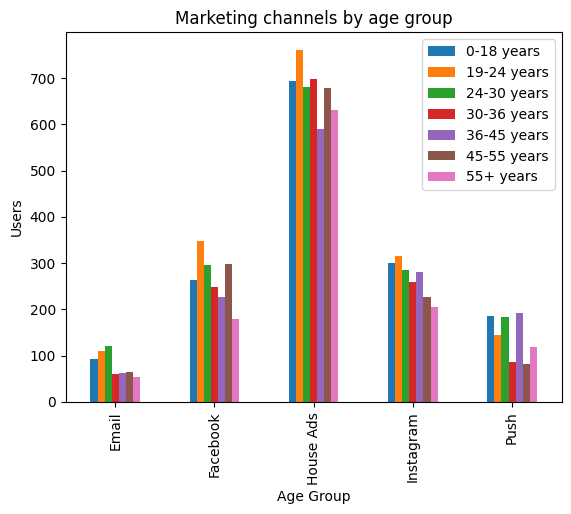

In [6]:
# Plot channel_age
channel_age_df.plot(kind = 'bar')
plt.title('Marketing channels by age group')
plt.xlabel('Age Group')
plt.ylabel('Users')
# Add a legend to the plot
plt.legend(loc = 'upper right', 
           labels = channel_age_df.columns.values)
plt.show()

Grouping and counting by multiple columns

Stakeholders have begun competing to see whose channel had the best retention rate from the campaign. You must first determine how many subscribers came from the campaign and how many of those subscribers have stayed on the service.

It's important to identify how each marketing channel is performing because this will affect company strategy going forward. If one channel is outperforming others, it might signal the channel merits further investment.

You will build on what we have learned about .groupby() in previous exercises, this time grouping by multiple columns.

In [7]:
# Count the subs by subscribing channel and day
retention_total = marketing.groupby(['date_subscribed',
                                     'subscribing_channel'])['user_id'].nunique()
retention_total

date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                8
                 House Ads              16
                 Instagram               8
                 Push                    3
                                        ..
2018-01-31       Email                   1
                 Facebook                6
                 House Ads               6
                 Instagram               3
                 Push                    2
Name: user_id, Length: 155, dtype: int64

In [8]:
# Sum the retained subs by subscribing channel and date subscribed
retention_subs = marketing[marketing['is_retained']==True].groupby(['date_subscribed', 
                                       'subscribing_channel'])['user_id'].nunique()
retention_subs

date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                7
                 House Ads              11
                 Instagram               6
                 Push                    3
                                        ..
2018-01-31       Email                   1
                 Facebook                5
                 House Ads               3
                 Instagram               2
                 Push                    1
Name: user_id, Length: 146, dtype: int64

Analyzing retention rates for the campaign

Now that you've calculated the total subscribers and retained subscribers, you can settle the question of which channel had the highest retention rate.

In this exercise, you will calculate the retention rate for each subscription channel and visualize your results.

In [9]:
# Divide retained subscribers by total subscribers
retention_rate = retention_subs/retention_total
retention_rate_df = pd.DataFrame(retention_rate.unstack(level=1))

retention_rate_df

subscribing_channel     Email  Facebook  House Ads  Instagram      Push
date_subscribed                                                        
2018-01-01           1.000000  0.875000   0.687500   0.750000  1.000000
2018-01-02           0.750000  1.000000   0.588235   0.625000  1.000000
2018-01-03                NaN  0.800000   0.647059   0.909091  0.666667
2018-01-04           0.500000  0.666667   0.466667   0.500000       NaN
2018-01-05           1.000000  0.571429   0.500000   0.636364  1.000000
2018-01-06           0.800000  0.571429   0.941176   0.500000  0.500000
2018-01-07           0.500000  0.750000   0.526316   0.400000  0.666667
2018-01-08                NaN  0.888889   0.500000   0.625000  1.000000
2018-01-09           0.500000  0.285714   0.850000   0.666667  0.500000
2018-01-10           1.000000  0.714286   0.666667   0.555556  1.000000
2018-01-11           0.333333  0.571429   0.166667   1.000000  1.000000
2018-01-12                NaN  0.571429        NaN   0.500000  0.333333
2018-01-13           0.333333  0.666667   0.166667   0.666667  0.500000
2018-01-14           1.000000  0.666667   0.166667   0.909091       NaN
2018-01-15           0.804348  0.375000   0.166667   0.875000  1.000000
2018-01-16           0.943396  0.588235   0.166667   0.294118  0.636364
2018-01-17           0.432432  0.642857   0.333333   0.894737  0.900000
2018-01-18           1.000000  0.666667   0.500000   0.900000       NaN
2018-01-19           1.000000  0.600000   0.600000   0.666667  1.000000
2018-01-20           1.000000  0.666667   0.833333   0.800000  1.000000
2018-01-21           1.000000  0.714286   0.600000   0.800000  1.000000
2018-01-22           1.000000  0.833333   0.666667   0.750000  1.000000
2018-01-23           1.000000  0.833333   0.600000   0.500000  1.000000
2018-01-24           0.500000  0.571429   0.666667   0.666667  1.000000
2018-01-25           0.500000  0.800000   0.833333   0.375000       NaN
2018-01-26           0.500000  0.833333   0.833333   0.800000  1.000000
2018-01-27                NaN  0.666667   0.833333   0.400000  0.333333
2018-01-28           0.333333  0.750000   0.666667   0.666667  1.000000
2018-01-29           1.000000  1.000000   0.400000   0.833333  0.500000
2018-01-30           0.666667  0.857143   0.500000   1.000000  0.500000
2018-01-31           1.000000  0.833333   0.500000   0.666667  0.500000

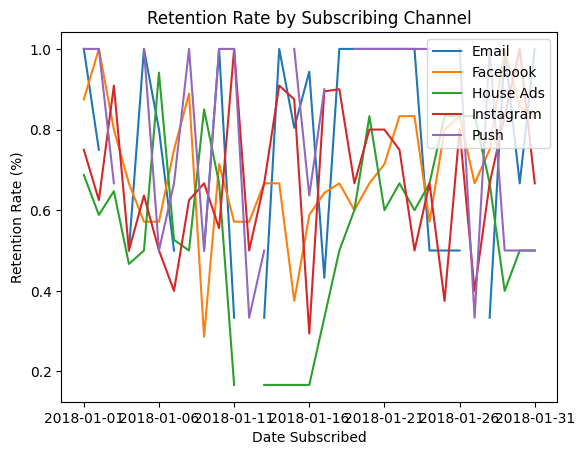

In [10]:
# Plot retention rate
retention_rate_df.plot()

# Add a title, x-label, y-label, legend and display the plot
plt.title('Retention Rate by Subscribing Channel')
plt.xlabel('Date Subscribed')
plt.ylabel('Retention Rate (%)')
plt.legend(loc = 'upper right',labels = retention_rate_df.columns.values)
plt.show()

Building a conversion function

You've been doing a lot of repetitive calculations. Anytime you notice repetition in your work, consider automation. The more of the low-variance work you can automate, the more time you will have to explore new and interesting data science topics at work. This will both impress your marketing stakeholders and be more fun!

Since you know the format of the marketing DataFrame will remain the same over time, you can build a function to enable you to calculate conversion rate across any sub-segment you want on the fly.

In this exercise, you will build a function that takes a DataFrame and list of column names and outputs the conversion rate across the column(s).

In [11]:
def conversion_rate(dataframe, column_names):
    # Total number of converted users
    column_conv = dataframe[dataframe['converted']==True].groupby(column_names)['user_id'].nunique()

    # Total number users
    column_total =  dataframe.groupby(column_names)['user_id'].nunique()  
    
    # Conversion rate 
    conversion_rate = column_conv/column_total
    
    # Fill missing values with 0
    conversion_rate = conversion_rate.fillna(0)
    
    return conversion_rate

Test and visualize conversion function

You've done the hard work of building your conversion rate function—now it's time to test it out! Automating your analyses can be time-consuming up front, but this is where it all pays off.

In this exercise, you'll see how quickly you can calculate the conversion rate. A task that in previous lessons took multiple steps. By automating the repetitive parts of your work, you'll be able to spend more time doing complex analyses.

In [12]:
# Calculate conversion rate by age_group
age_group_conv = conversion_rate(marketing, ['date_served', 'age_group'])
print(age_group_conv)

# Unstack and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack(level='age_group'))

age_group_df

date_served  age_group  
2018-01-01   0-18 years     0.155172
             19-24 years    0.196721
             24-30 years    0.105263
             30-36 years    0.040816
             36-45 years    0.042553
                              ...   
2018-01-31   24-30 years    0.057692
             30-36 years    0.000000
             36-45 years    0.035088
             45-55 years    0.023256
             55+ years      0.026316
Name: user_id, Length: 217, dtype: float64


age_group    0-18 years  19-24 years  24-30 years  30-36 years  36-45 years  \
date_served                                                                   
2018-01-01     0.155172     0.196721     0.105263     0.040816     0.042553   
2018-01-02     0.180328     0.164384     0.114754     0.040000     0.043478   
2018-01-03     0.102041     0.208955     0.150943     0.042553     0.060000   
2018-01-04     0.117647     0.200000     0.183673     0.045455     0.043478   
2018-01-05     0.142857     0.250000     0.136364     0.090909     0.068182   
2018-01-06     0.120000     0.188679     0.145833     0.078947     0.073171   
2018-01-07     0.128205     0.220000     0.153846     0.100000     0.111111   
2018-01-08     0.142857     0.196078     0.140000     0.069767     0.069767   
2018-01-09     0.148936     0.200000     0.152174     0.090909     0.093023   
2018-01-10     0.100000     0.216667     0.129630     0.068182     0.088889   
2018-01-11     0.085106     0.187500     0.173913     0.000000     0.000000   
2018-01-12     0.071429     0.226415     0.076923     0.075000     0.000000   
2018-01-13     0.105263     0.130435     0.113636     0.052632     0.100000   
2018-01-14     0.136364     0.200000     0.071429     0.025000     0.025641   
2018-01-15     0.131148     0.170543     0.158940     0.090909     0.061224   
2018-01-16     0.338462     0.371429     0.408451     0.109091     0.095238   
2018-01-17     0.244898     0.315789     0.220339     0.224490     0.196721   
2018-01-18     0.061224     0.244898     0.119048     0.020408     0.024390   
2018-01-19     0.050000     0.060000     0.119048     0.050000     0.020833   
2018-01-20     0.089286     0.095238     0.085106     0.075000     0.048780   
2018-01-21     0.131579     0.113636     0.133333     0.029412     0.074074   
2018-01-22     0.103448     0.242424     0.117647     0.000000     0.035714   
2018-01-23     0.090909     0.103448     0.218750     0.125000     0.052632   
2018-01-24     0.228571     0.178571     0.161290     0.000000     0.093750   
2018-01-25     0.120000     0.305556     0.240000     0.000000     0.000000   
2018-01-26     0.111111     0.187500     0.205128     0.000000     0.000000   
2018-01-27     0.125000     0.069767     0.086957     0.065217     0.025641   
2018-01-28     0.066667     0.156250     0.119048     0.000000     0.042553   
2018-01-29     0.020833     0.106383     0.171875     0.000000     0.000000   
2018-01-30     0.104167     0.061224     0.088889     0.052632     0.048780   
2018-01-31     0.102041     0.105263     0.057692     0.000000     0.035088   

age_group    45-55 years  55+ years  
date_served                          
2018-01-01      0.022222   0.086957  
2018-01-02      0.043478   0.024390  
2018-01-03      0.047619   0.043478  
2018-01-04      0.061224   0.073171  
2018-01-05      0.046512   0.088889  
2018-01-06      0.068182   0.078947  
2018-01-07      0.128205   0.117647  
2018-01-08      0.051282   0.102564  
2018-01-09      0.068182   0.102564  
2018-01-10      0.090909   0.100000  
2018-01-11      0.055556   0.029412  
2018-01-12      0.000000   0.045455  
2018-01-13      0.023256   0.052632  
2018-01-14      0.073171   0.000000  
2018-01-15      0.074468   0.035294  
2018-01-16      0.130435   0.153846  
2018-01-17      0.156863   0.162791  
2018-01-18      0.074074   0.088235  
2018-01-19      0.071429   0.046512  
2018-01-20      0.000000   0.078947  
2018-01-21      0.074074   0.034483  
2018-01-22      0.150000   0.176471  
2018-01-23      0.038462   0.200000  
2018-01-24      0.000000   0.055556  
2018-01-25      0.093750   0.000000  
2018-01-26      0.000000   0.093750  
2018-01-27      0.022222   0.026316  
2018-01-28      0.000000   0.000000  
2018-01-29      0.041667   0.000000  
2018-01-30      0.024390   0.081081  
2018-01-31      0.023256   0.026316

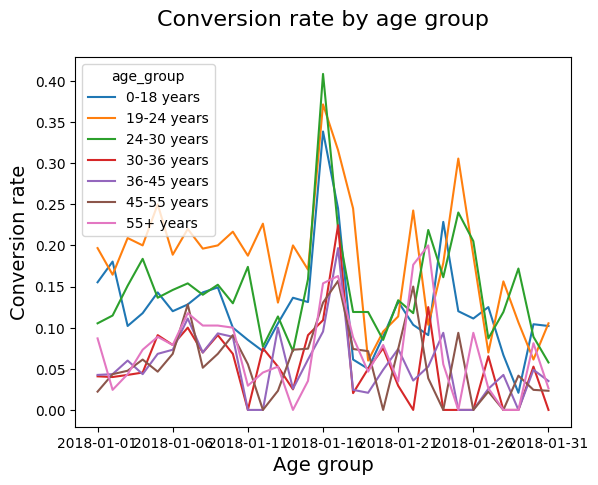

In [13]:
# Visualize conversion by age_group
age_group_df.plot()
plt.title('Conversion rate by age group\n', size = 16)
plt.ylabel('Conversion rate', size = 14)
plt.xlabel('Age group', size = 14)
plt.show()

Plotting function

Now that you've looked at conversion rate by age, you want to see if that trend has changed over time. Marketing has been changing their strategy and wants to make sure that their new method isn't alienating age groups that are less comfortable with their product. However, to do so, you need to create a plotting function to make it easier to visualize your results.

In this exercise, you will build a function to plot the results of your conversion rate function.

In [14]:
def plotting_conv(dataframe):
    for column in dataframe:
        # Set figure size
        plt.figure(figsize=(12, 6))
        # Plot column by dataframe's index
        plt.plot(dataframe.index, dataframe[column])
        plt.title('Daily ' + str(column) + ' Conversion Rate\n', size=16)
        plt.ylabel('Conversion Rate', size=14)
        plt.xlabel('Date', size=14)
        # Rotate dates on x-axis
        plt.xticks(rotation=45)
        # Show plot
        plt.show()  
        plt.clf()


Putting it all together

Your marketing stakeholders have requested a report of the daily conversion rate for each age group, and they need it as soon as possible. They want you to refresh this report on a monthly cadence. This is a perfect opportunity to utilize your functions. Not only will the functions help you get this report out promptly today, but it will also help each month when it's time for a refresh of the data.

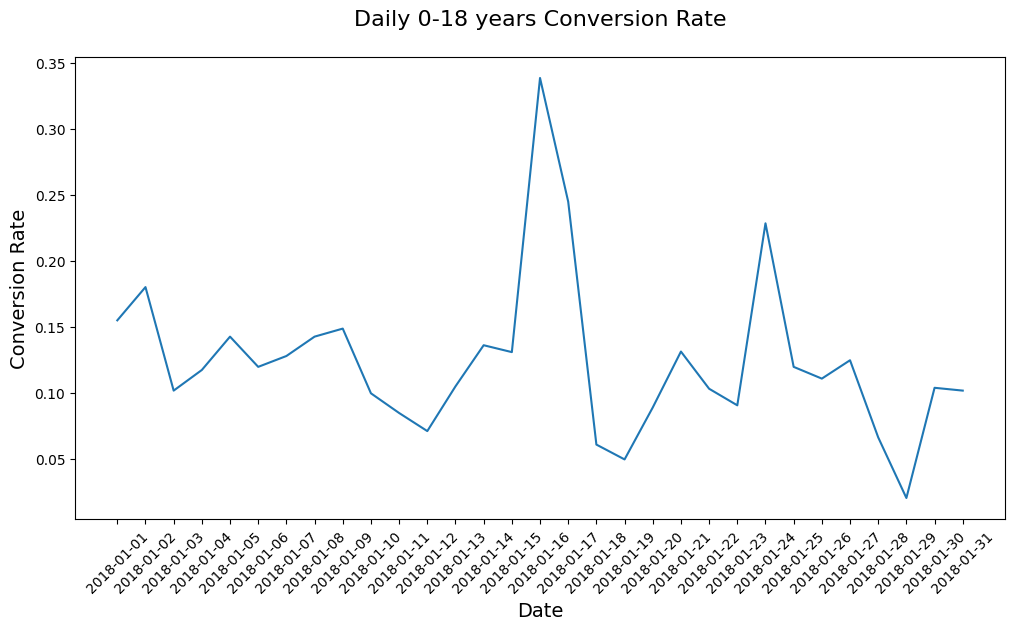

<Figure size 640x480 with 0 Axes>

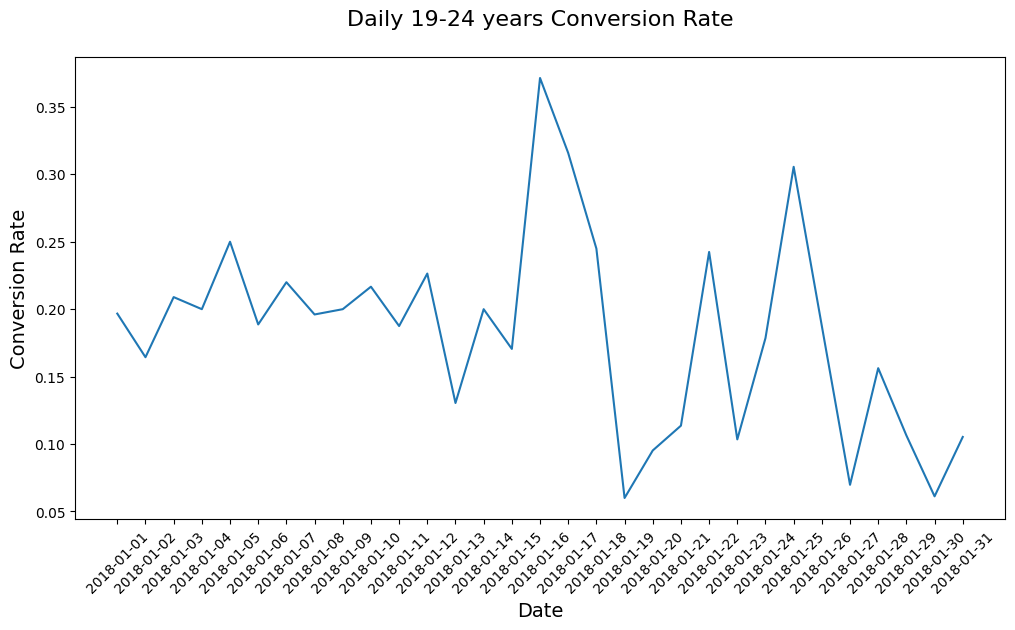

<Figure size 640x480 with 0 Axes>

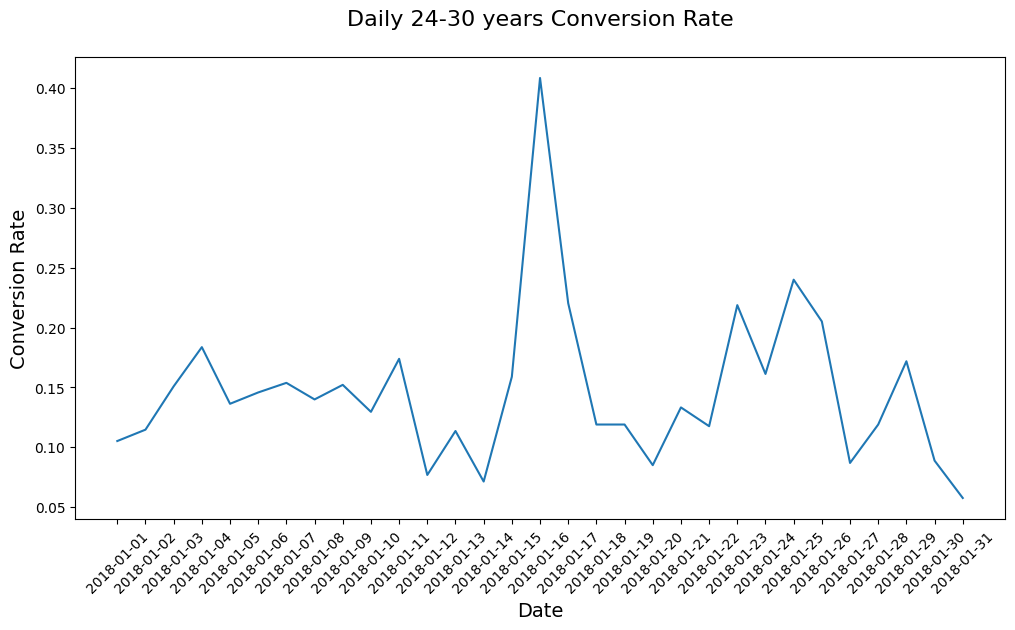

<Figure size 640x480 with 0 Axes>

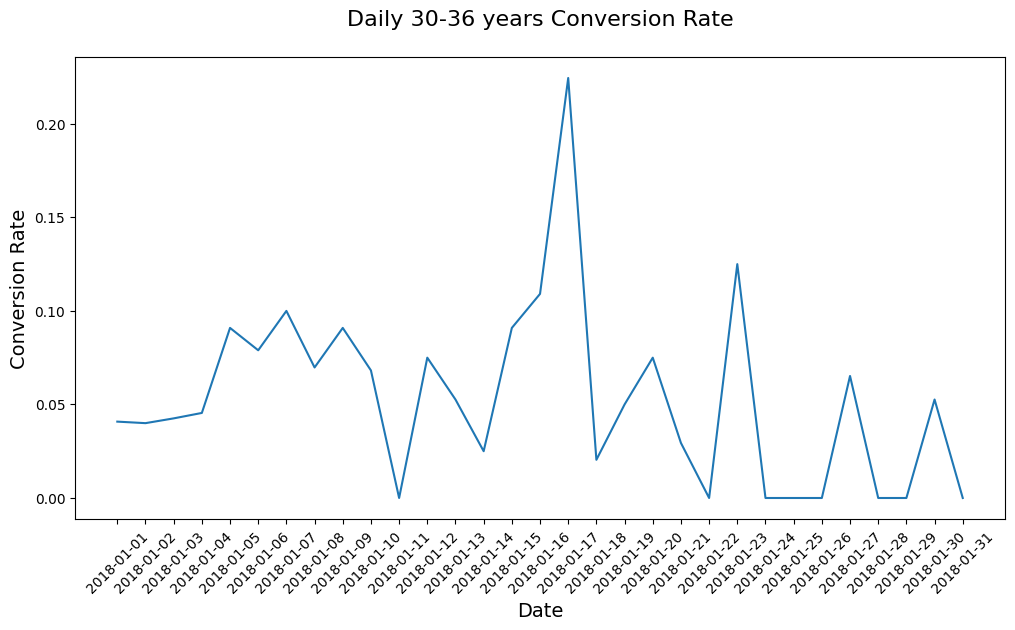

<Figure size 640x480 with 0 Axes>

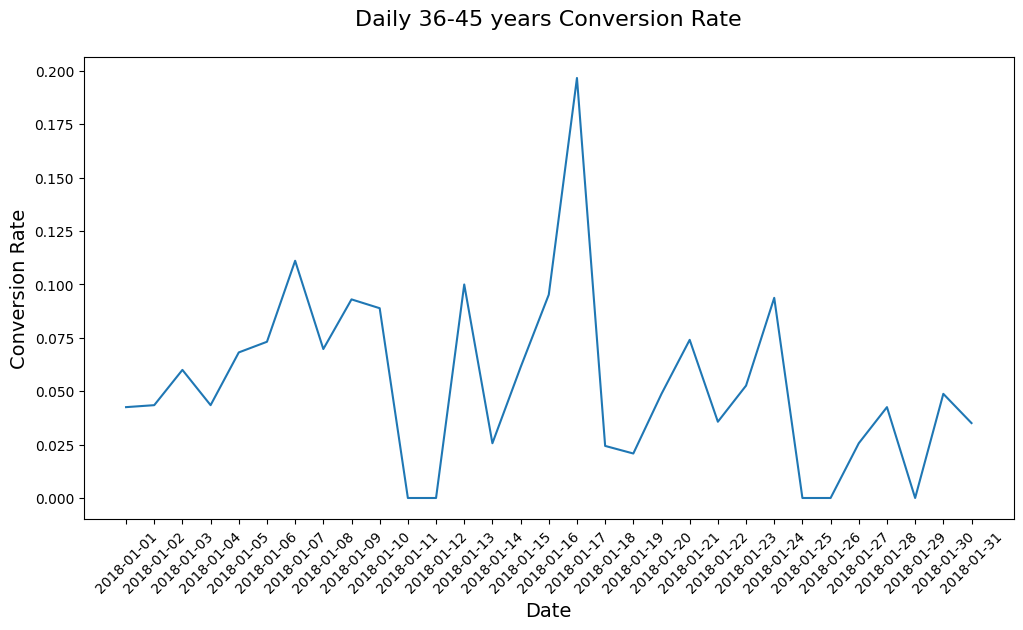

<Figure size 640x480 with 0 Axes>

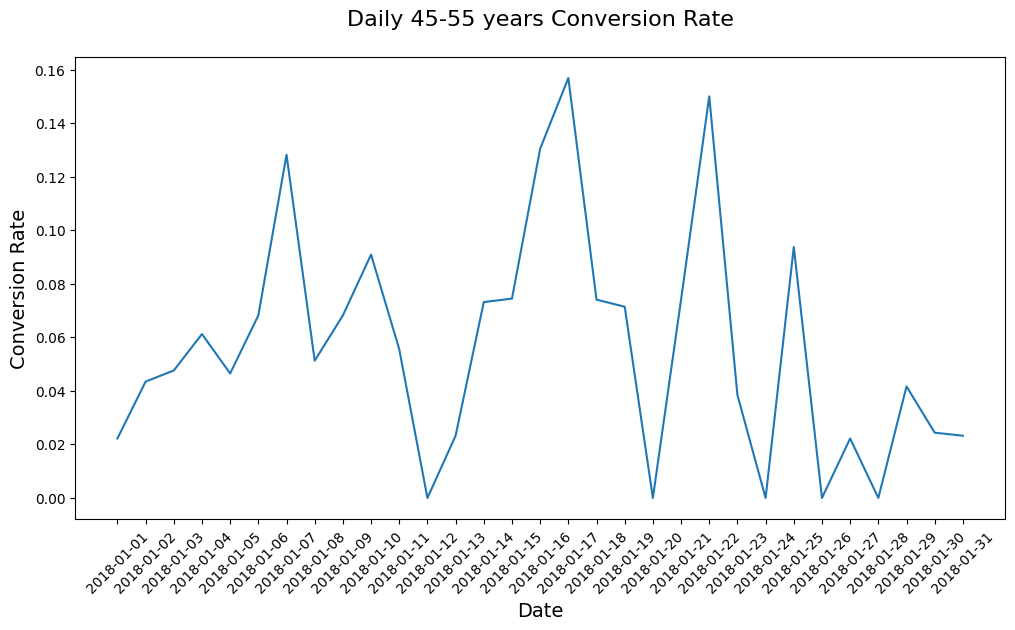

<Figure size 640x480 with 0 Axes>

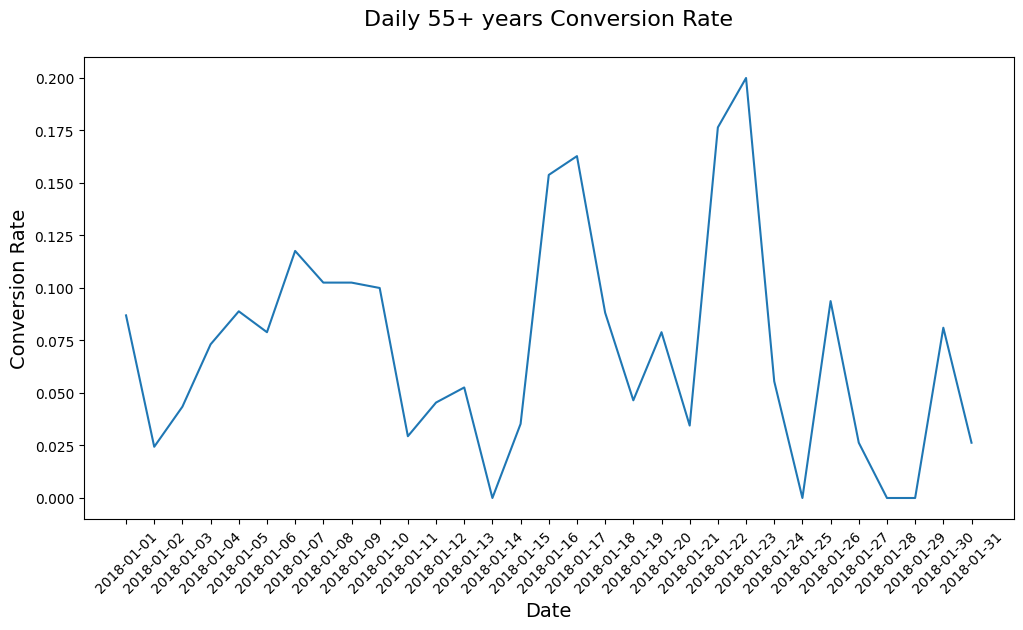

<Figure size 640x480 with 0 Axes>

In [15]:
# Calculate conversion rate by date served and age group
age_group_conv = conversion_rate(marketing,['date_served','age_group'])

# Unstack age_group_conv and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack(level=1))

# Plot the results
plotting_conv(age_group_df)